# Uber Ride Analysis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and Data Cleaning

In [87]:
df = pd.read_csv("UberDataset.csv")

In [88]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01/01/2016 21:11,01/01/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01/02/2016 1:25,01/02/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01/02/2016 20:25,01/02/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01/05/2016 17:31,01/05/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01/06/2016 14:42,01/06/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [89]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [90]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [91]:
# Converting START_DATE and END_DATE to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m/%d/%Y %H:%M',  errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce')

In [92]:
# Extracting Date and Time separately
df['START_DATE_ONLY']= df['START_DATE'].dt.date
df['START_TIME_ONLY']= df['START_DATE'].dt.time

df['END_DATE_ONLY']= df['END_DATE'].dt.date
df['END_TIME_ONLY']= df['END_DATE'].dt.time

In [93]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DATE_ONLY,START_TIME_ONLY,END_DATE_ONLY,END_TIME_ONLY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,01:25:00,2016-01-02,01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00


In [94]:
missing_rows = df[df[['END_DATE', 'CATEGORY', 'START', 'STOP']].isna().all(axis=1)]

In [95]:
missing_rows

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DATE_ONLY,START_TIME_ONLY,END_DATE_ONLY,END_TIME_ONLY
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN,NaT,NaT,NaT,NaT


In [96]:
# Drop the last row (total row)
df= df.iloc[:-1]

In [97]:
df.isnull().sum()

START_DATE           0
END_DATE             0
CATEGORY             0
START                0
STOP                 0
MILES                0
PURPOSE            502
START_DATE_ONLY      0
START_TIME_ONLY      0
END_DATE_ONLY        0
END_TIME_ONLY        0
dtype: int64

In [98]:
#Replace missing purpose values with Not_defined
df['PURPOSE']= df['PURPOSE'].fillna('Not_defined')

In [99]:
df.isnull().sum()

START_DATE         0
END_DATE           0
CATEGORY           0
START              0
STOP               0
MILES              0
PURPOSE            0
START_DATE_ONLY    0
START_TIME_ONLY    0
END_DATE_ONLY      0
END_TIME_ONLY      0
dtype: int64

In [100]:
#Extracting days from date
df['day_of_week'] = df['START_DATE'].dt.day_name()

In [101]:
df['day_of_week'].head()

0       Friday
1     Saturday
2     Saturday
3      Tuesday
4    Wednesday
Name: day_of_week, dtype: object

# Exploratory Data Analysis

### 1. Analyze the frequency of rides at different hours of the day and identify peak ride times.

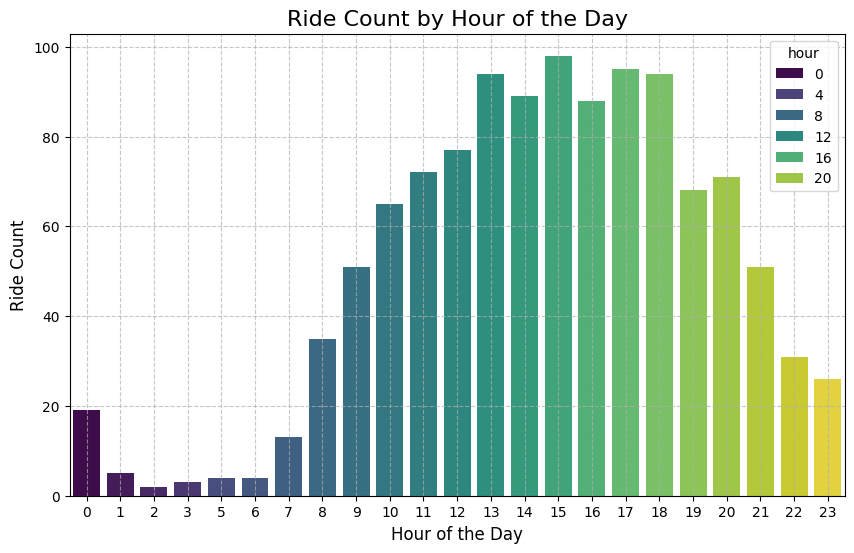

In [199]:
df['hour']= df['START_DATE'].dt.hour

plt.figure(figsize=(10,6))
sns.countplot(x='hour', data=df, hue='hour',palette='viridis')
plt.title('Ride Count by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day',fontsize=12)
plt.ylabel('Ride Count',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight**: The ride frequency shows a significant peak between **13:00(1:00 PM) and 18:00(6:00 PM)**, it indicates that there is a high demand for rides during this window 

### 2. What is purose of Rides during peak hours?

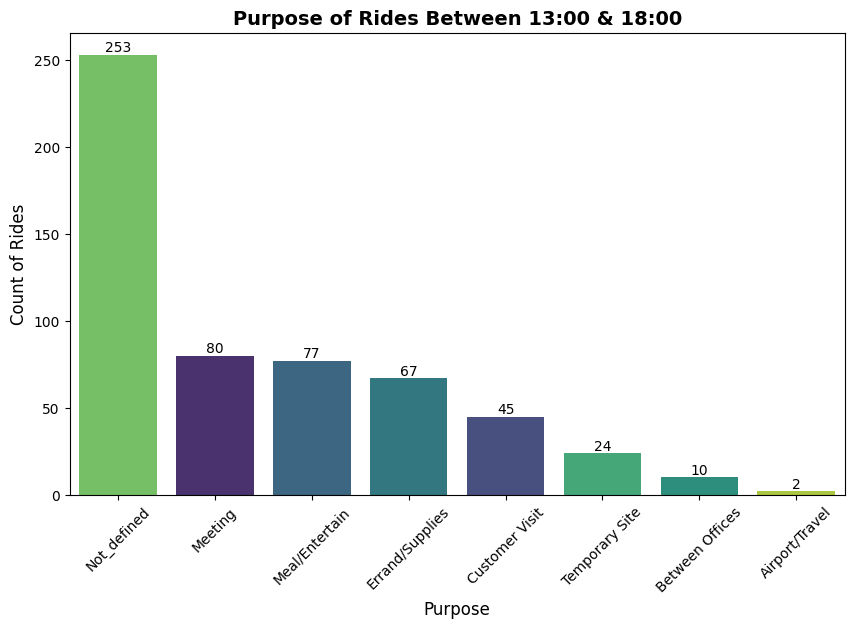

In [206]:
peak_hours_df= df[(df['hour']>= 13) & (df['hour']<=18)]

plt.figure(figsize=(10,6))
ax= sns.countplot(x='PURPOSE', data=peak_hours_df, order=peak_hours_df['PURPOSE'].value_counts().index, hue='PURPOSE', palette='viridis')
plt.title('Purpose of Rides Between 13:00 & 18:00', fontsize=14, fontweight='bold')
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Count of Rides', fontsize=12)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()


**Insight**: During peak hours (1 PM - 6 PM), most rides have not defined purposes, while **Meetings, Meals/Entertainment, and Errands/Supplies** are the most common known purposes, indicating high demand for business and social activities

### 3. What is ride frequency by Day of the week?

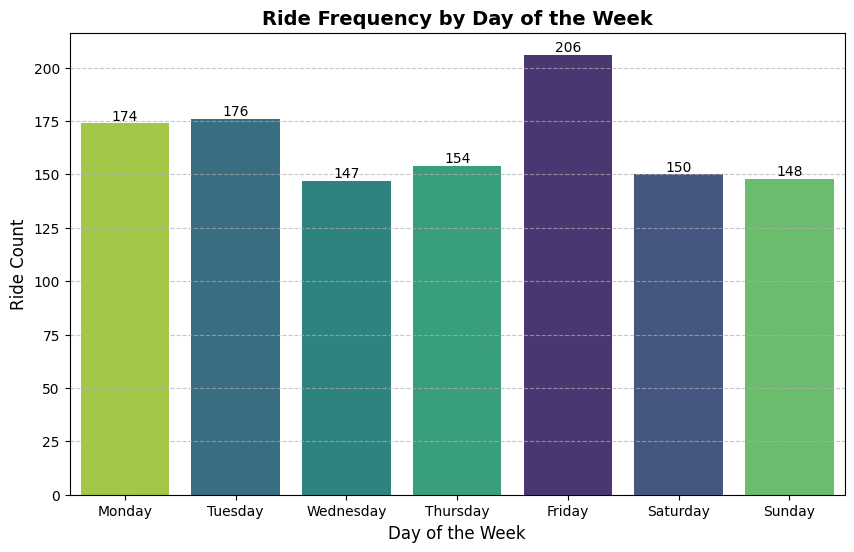

In [208]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x='day_of_week', data=df, order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='day_of_week', palette='viridis')
plt.title('Ride Frequency by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

**Insight**: **Friday**  has the highest ride count at 206, indicating increased travel activity **leading into the weekend. Monday** and **Tuesday** follow closely, suggesting steady weekday commuting. Wednesday has the lowest ride activity, while Thursday, Saturday, and Sunday maintain a relatively balanced but lower frequency

### 4. What is the distribution of Ride distance(Miles)?

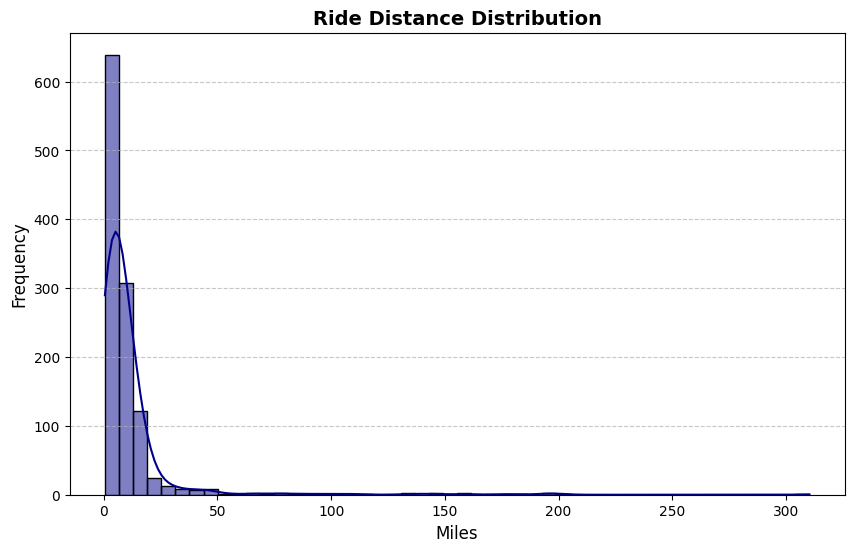

In [211]:
plt.figure(figsize=(10,6))
sns.histplot(df, x= 'MILES',bins=50, kde=True, color='darkblue')
plt.title('Ride Distance Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Miles', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight**: The majority of rides fall within the **1-50 mile range**, with the **highest concentration in the first bin**. The KDE curve emphasizes that shorter trips are more common, indicating frequent short-distance travel, likely for daily commutes or nearby destinations

### 5.What is the average ride duration by day of the week?

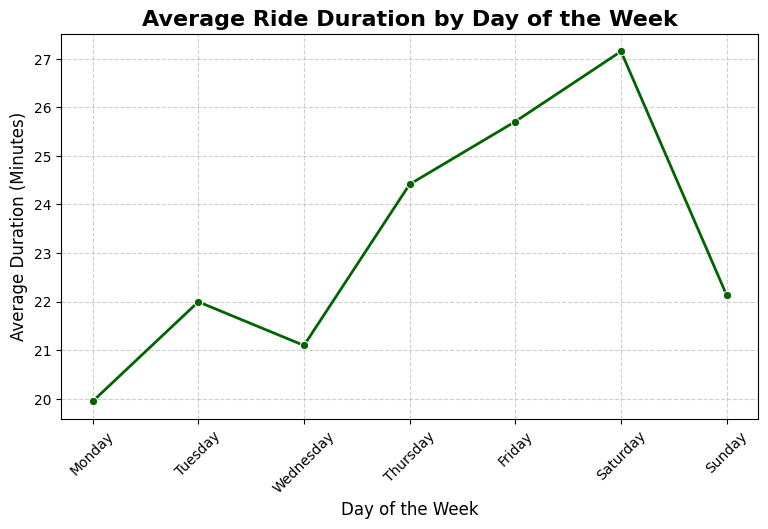

In [212]:
avg_duration_by_day = df.groupby('day_of_week')['DURATION_MINUTES'].mean().reset_index()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_duration_by_day['day_of_week'] = pd.Categorical(avg_duration_by_day['day_of_week'], categories=ordered_days, ordered=True)

plt.figure(figsize=(9, 5))
sns.lineplot(x='day_of_week', y='DURATION_MINUTES', data=avg_duration_by_day, marker='o', color="darkgreen", linewidth=2)
plt.title('Average Ride Duration by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Duration (Minutes)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Insight**: The average ride duration is **highest on Saturday**, followed closely by **Friday and Sunday**. This suggests that longer rides are more likely during weekends, possibly due to leisure activities or travel. **Monday shows the shortest average** ride duration, possibly reflecting quicker, more routine trips as people start their workweek.

### 6. What is the Ride Duration for each Category?

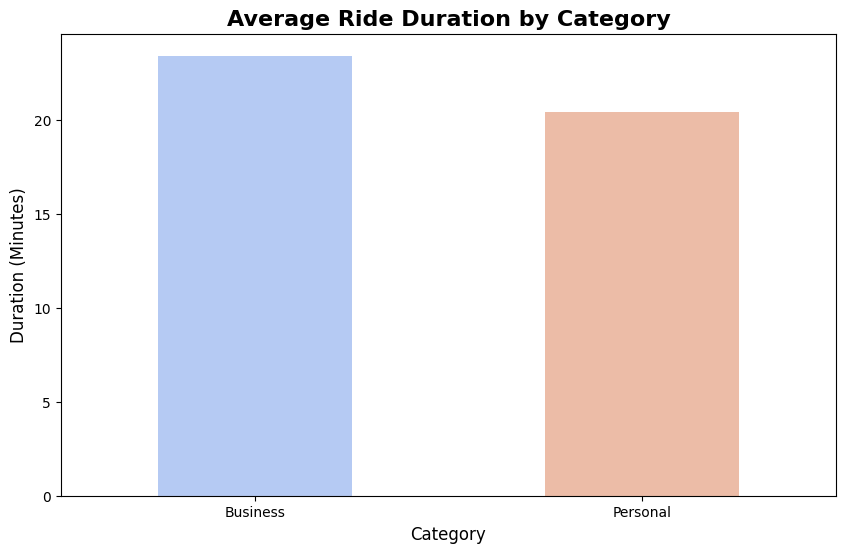

In [225]:
# Calculate duration in minutes
df['DURATION_MINUTES'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60 

avg_duration= df.groupby('CATEGORY')['DURATION_MINUTES'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='CATEGORY', y='DURATION_MINUTES', data=avg_duration, hue='CATEGORY', palette='coolwarm',width=0.5)
plt.title('Average Ride Duration by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.show()

**Insight**: The average duration of **personal rides is around 20 minutes**, while **business rides average approximately 25 minutes**. This indicates that business rides are typically longer than personal ones.

### 7. What is the correlation between ride distance and duration?

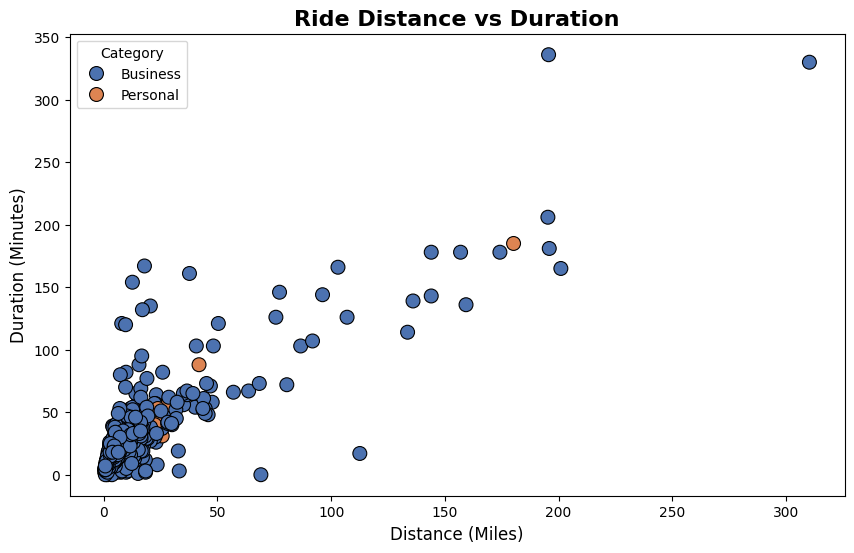

In [242]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MILES', y='DURATION_MINUTES', data=df, hue='CATEGORY', palette='deep', s=100, edgecolor='black')
plt.title('Ride Distance vs Duration', fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.legend(title='Category', loc='upper left')
plt.show()

**Insight**: The scatter plot reveals that there is a **positive correlation between ride distance and duration**, with business rides primarily covering short distances and having relatively shorter durations. while fewer, Personal rides follow a similar distance-duration pattern

## Recommendations:

**Peak Hour Strategy**: Since the highest ride frequency occurs between 13:00-18:00, Uber could consider optimizing driver availability during these hours to meet the high demand. Implementing dynamic pricing could help manage the surge during this period.

**Categorization of Rides**: The "undefined" category for ride purpose during peak hours indicates an opportunity for Uber to enhance ride categorization. Encouraging riders to select a more accurate purpose might help in targeting rides more effectively (e.g., offering promotions for meetings or meals/entertainment).

**Leisure Rides**: Given that ride duration is higher on weekends, Uber might consider offering special deals or packages for leisure trips on Friday, Saturday, and Sunday to attract more riders looking for longer trips.

**Improving Business Rides**: Business rides tend to have longer durations, so offering business-specific services such as faster rides or premium options could be an opportunity to cater to this category more effectively.

**Route Optimization**: The correlation between ride distance and duration suggests that Uber could use this insight for better route optimization and time estimates. Implementing algorithms that factor in both distance and expected duration could improve overall customer satisfaction and operational efficiency.